# Environment

In [1]:
import pandas as pd
import yaml
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/neu_vs_nsc_endo"

ENRICHMENT_FILE = f"{BASE_DIR}/cpg_enrichment_parallel.csv"
print(ENRICHMENT_FILE)

OUTPUT_LISTS_PATH = f"{BASE_DIR}/lists"
print(OUTPUT_LISTS_PATH)
os.makedirs(OUTPUT_LISTS_PATH, exist_ok=True)

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents

sys.path.append("/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment")
try:
    import functions
    importlib.reload(functions)
    from functions import *
except ModuleNotFoundError:
    print("Warning: Could not import functions module. Make sure functions.py exists in the code7_cpg_enrichment directory.")


/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/neu_vs_nsc_endo/cpg_enrichment_parallel.csv
/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/neu_vs_nsc_endo/lists


# Load Data

In [2]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(ENRICHMENT_FILE)

In [3]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (14871, 24)

First few rows:


,chr,start,end,neu_signal,nsc_signal,fold_change,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
0,chr1,3531624,3531843,2.845584,12.768126,0.222866,0.666667,both,nsc_only,False,2,1,"6.635254696011543,0.0,1.901497251712359","0.0,0.0,38.30437894050892",416,219,CpG:,611,0,1,NaN,5.10095,3531809,3532225
1,chr1,3670619,3671074,51.041933,13.800820,3.698471,0.100000,both,neu_only,False,3,3,"46.80457341624963,64.44004480749791,41.88117982613994","11.392776214324677,14.437202170702175,15.57248052329477",1554,455,CpG:,613,1,0,12.1862,NaN,3670786,3672340
2,chr1,3671654,3672156,51.041933,13.800820,3.698471,0.100000,both,neu_only,False,3,3,"46.80457341624963,64.44004480749791,41.88117982613994","11.392776214324677,14.437202170702175,15.57248052329477",1554,502,CpG:,613,2,0,14.2013;12.1862,NaN,3670786,3672340
3,chr1,4491701,4493673,3.953878,8.716315,0.453618,0.333333,both,nsc_only,False,2,2,"4.857184294392081,0.0,7.0044510406606335","13.231673493104822,0.0,12.917271586025462",1360,1972,CpG:,619,0,1,NaN,4.1282,4492093,4493453
4,chr1,4496947,4497608,5.056848,1.620731,3.120104,0.666667,both,neu_only,False,2,2,"12.533199566008838,0.0,2.637344861316631","1.6485985968345518,0.0,3.213593737184846",1917,661,CpG:,619,1,0,4.61906,NaN,4496686,4498603



Column names:
['chr', 'start', 'end', 'neu_signal', 'nsc_signal', 'fold_change', 'pvalue', 'binding_type', 'binding_type_by_peaks', 'significant', 'neu_replicates_with_signal', 'nsc_replicates_with_signal', 'neu_replicate_signals', 'nsc_replicate_signals', 'region_length', 'cpg_length', 'cpg_score', 'cpg_name', 'neu_replicates_with_peaks', 'nsc_replicates_with_peaks', 'neu_peak_scores_by_rep', 'nsc_peak_scores_by_rep', 'region_start', 'region_end']


In [4]:
cpg_enrichment_df = cpg_enrichment_df.rename(columns={'fold_change': 'enrichment'})

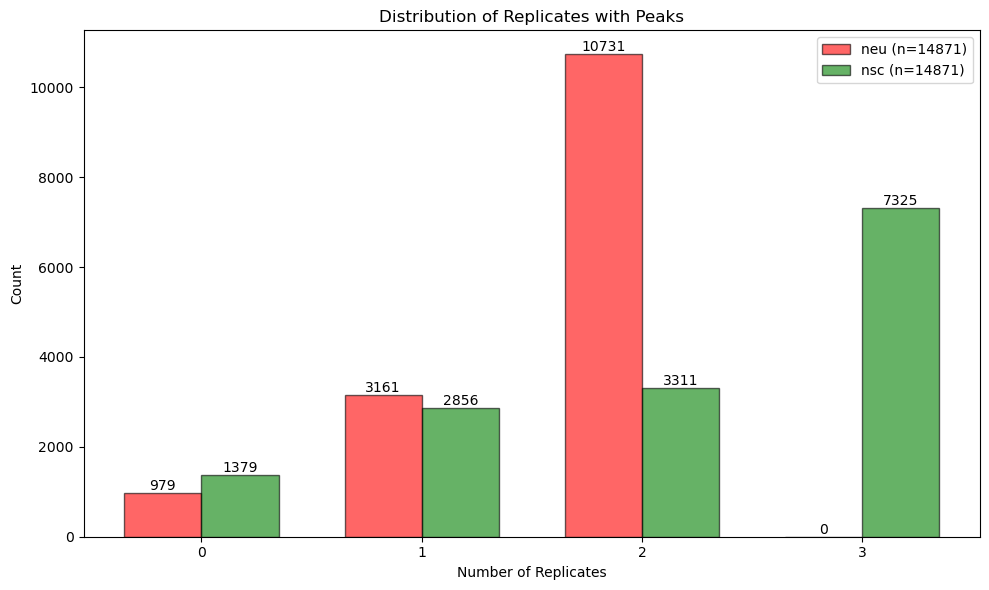

In [5]:
# Create single plot
plt.figure(figsize=(10, 6))

# Get data for plotting
x = np.arange(4)  # 0 through 3 replicates
neu_counts = [len(cpg_enrichment_df[cpg_enrichment_df['neu_replicates_with_peaks'] == i]) for i in range(4)]
nsc_counts = [len(cpg_enrichment_df[cpg_enrichment_df['nsc_replicates_with_peaks'] == i]) for i in range(4)]

# Plot bars side by side
width = 0.35
plt.bar(x - width/2, neu_counts, width, label=f'neu (n={sum(neu_counts)})', color='red', alpha=0.6, edgecolor='black')
plt.bar(x + width/2, nsc_counts, width, label=f'nsc (n={sum(nsc_counts)})', color='green', alpha=0.6, edgecolor='black')

# Add value labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, neu_counts[i], str(neu_counts[i]), 
             ha='center', va='bottom')
    plt.text(x[i] + width/2, nsc_counts[i], str(nsc_counts[i]),
             ha='center', va='bottom')

plt.title('Distribution of Replicates with Peaks')
plt.xlabel('Number of Replicates')
plt.ylabel('Count')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Split data based on binding type

## By signal value

Non zero signal in minumum 2 replicates

In [7]:
# Split data based on binding type
neu_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'neu_only']
nsc_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'nsc_only'] 
both_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by neu only: {len(neu_only_df_by_signal)}")
print(f"Number of CpG islands bound by nsc only: {len(nsc_only_df_by_signal)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_signal)}")


Number of CpG islands bound by neu only: 128
Number of CpG islands bound by nsc only: 15
Number of CpG islands bound by both: 14728


## By peaks number

Minimum 1 replicates with peaks

In [8]:
# Split data based on binding type
neu_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'neu_only']
nsc_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'nsc_only'] 
both_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by neu only: {len(neu_only_df_by_peaks)}")
print(f"Number of CpG islands bound by nsc only: {len(nsc_only_df_by_peaks)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_peaks)}")


Number of CpG islands bound by neu only: 1379
Number of CpG islands bound by nsc only: 979
Number of CpG islands bound by both: 12513


# Data analysis

## Both: enrichment distribution

In [9]:
print("Summary statistics of enrichment values selected by signal:")
print(both_df_by_signal['enrichment'].describe())

print("\nSummary statistics of enrichment values selected by peaks:")
print(both_df_by_peaks['enrichment'].describe())

Summary statistics of enrichment values selected by signal:
count    14728.000000
mean         3.582693
std         40.216964
min          0.017629
25%          1.239067
50%          1.835131
75%          2.725572
max       3043.026704
Name: enrichment, dtype: float64

Summary statistics of enrichment values selected by peaks:
count    1.251300e+04
mean              inf
std               NaN
min      8.017512e-02
25%      1.278375e+00
50%      1.852896e+00
75%      2.672085e+00
max               inf
Name: enrichment, dtype: float64


/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


== fold change (Neuron/NSC) ==

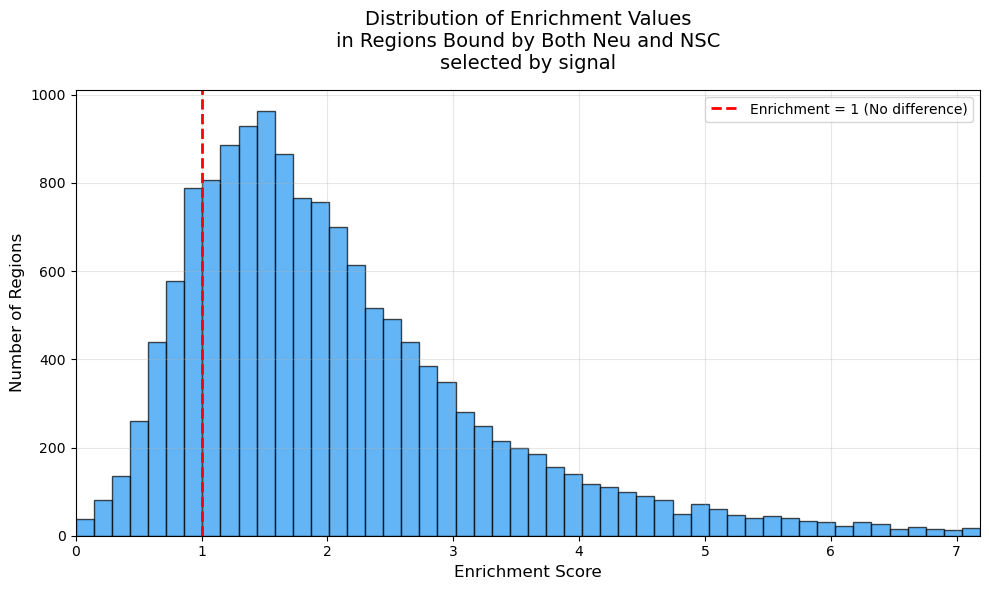

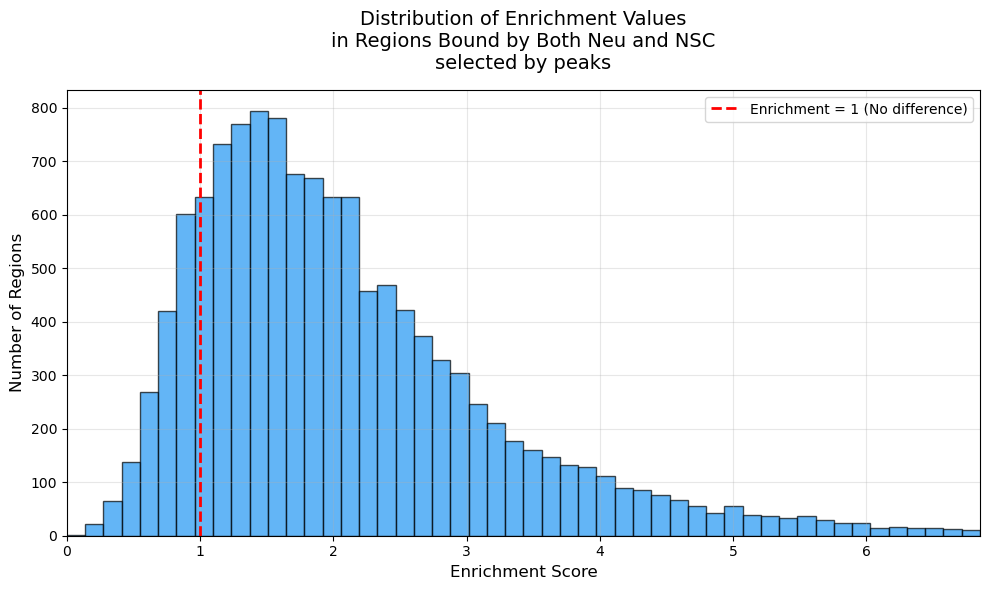

In [10]:
range_min_signal, range_max_signal = plot_enrichment_distribution_neu_vs_nsc(both_df_by_signal, title="selected by signal")
range_min_peaks, range_max_peaks = plot_enrichment_distribution_neu_vs_nsc(both_df_by_peaks, title="selected by peaks")


## Both: enrichment outliers

In [11]:
outliers_df_signal = both_df_by_signal[both_df_by_signal['enrichment'] > range_max_signal].copy()
print(f"\nNumber of outliers selected by signal(enrichment > {range_max_signal}):", len(outliers_df_signal))

outliers_df_peaks = both_df_by_peaks[both_df_by_peaks['enrichment'] > range_max_peaks].copy()
print(f"\nNumber of outliers selected by peaks(enrichment > {range_max_peaks}):", len(outliers_df_peaks))


Number of outliers selected by signal(enrichment > 7.185087089212268): 437

Number of outliers selected by peaks(enrichment > 6.8532168493958885): 224


In [12]:
outliers_df_signal.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
9816,chr4,140034425,140034657,20.495094,0.006735,3043.026704,0.5,both,both,False,3,1,"35.188613834425084,13.608487163663918,12.688179579448187","0.0,0.0,0.02020530431294423",1301,232,CpG:,1653,1,2,12.1323,5.61033;3.11511,140034373,140035674
4616,chr15,76002957,76004677,23.531489,0.008887,2647.920164,0.5,both,neu_only,False,3,1,"22.412463105958082,12.290410596748877,35.891593398718996","0.0,0.0,0.026660345751663733",580,1720,CpG:,1164,1,0,6.57645,NaN,76003305,76003885
120,chr1,37875331,37875824,13.078606,0.006885,1899.625849,0.5,both,both,False,3,1,"10.308551995285795,23.44580811978785,5.481458635973441","0.0,0.020654498237319005,0.0",1705,493,CpG:,873,1,2,4.20458,3.25313;5.92257,37874909,37876614
5967,chr17,47672400,47672829,44.641029,0.045789,974.930449,0.5,both,neu_only,False,3,1,"15.480388649473799,108.23670611280076,10.20599128236162","0.0,0.13736681025078956,0.0",235,429,CpG:,948,1,0,7.14251,NaN,47672467,47672702
995,chr10,50900711,50901152,15.445646,0.016971,910.100900,0.5,both,neu_only,False,3,1,"15.546214704568676,29.684237662078328,1.1064859107280283","0.05091406706440656,0.0,0.0",519,441,CpG:,973,1,0,9.94573,NaN,50900611,50901130


In [13]:
print_outlier_groups(outliers_df_signal, "signal")


First 5 outliers selected by signal:
chr4:140,034,425-140,034,657                      enrichment: 3043.026703544749
chr15:76,002,957-76,004,677                       enrichment: 2647.9201642394496
chr1:37,875,331-37,875,824                        enrichment: 1899.625849063471
chr17:47,672,400-47,672,829                       enrichment: 974.9304493577
chr10:50,900,711-50,901,152                       enrichment: 910.100900381

Middle 5 outliers selected by signal:
chr1:120,340,460-120,341,881                      enrichment: 11.816012249700313
chr7:28,630,355-28,630,817                        enrichment: 11.717841133740936
chr3:123,690,706-123,691,099                      enrichment: 11.667802410514131
chr12:55,080,008-55,080,835                       enrichment: 11.579225764859386
chr7:19,857,825-19,858,108                        enrichment: 11.528659975740256

Last 5 outliers selected by signal:
chr8:121,273,037-121,273,282                      enrichment: 7.238268004909594
chr2:16

In [14]:
n_rows = len(outliers_df_signal)

print("\nFirst 5 outliers selected by signal:")
for _, row in outliers_df_signal[:5].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

if n_rows > 10:
    mid_start = n_rows//2 - 2
    print("\nMiddle 5 outliers selected by signal:")
    for _, row in outliers_df_signal[mid_start:mid_start+5].iterrows():
        print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

print("\nLast 5 outliers selected by signal:")
for _, row in outliers_df_signal[-5:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")


First 5 outliers selected by signal:
chr4:140,034,425-140,034,657                      enrichment: 3043.026703544749
chr15:76,002,957-76,004,677                       enrichment: 2647.9201642394496
chr1:37,875,331-37,875,824                        enrichment: 1899.625849063471
chr17:47,672,400-47,672,829                       enrichment: 974.9304493577
chr10:50,900,711-50,901,152                       enrichment: 910.100900381

Middle 5 outliers selected by signal:
chr1:120,340,460-120,341,881                      enrichment: 11.816012249700313
chr7:28,630,355-28,630,817                        enrichment: 11.717841133740936
chr3:123,690,706-123,691,099                      enrichment: 11.667802410514131
chr12:55,080,008-55,080,835                       enrichment: 11.579225764859386
chr7:19,857,825-19,858,108                        enrichment: 11.528659975740256

Last 5 outliers selected by signal:
chr8:121,273,037-121,273,282                      enrichment: 7.238268004909594
chr2:16

In [15]:
print_outlier_groups(outliers_df_peaks, "peaks")


First 5 outliers selected by peaks:
chr3:95,356,816-95,357,319                        enrichment: inf
chr3:99,240,888-99,241,581                        enrichment: inf
chr2:25,311,238-25,311,568                        enrichment: inf
chr6:83,368,001-83,368,474                        enrichment: inf
chr17:29,326,590-29,326,916                       enrichment: inf

Middle 5 outliers selected by peaks:
chr9:124,423,168-124,426,073                      enrichment: 9.86820943776063
chr6:86,525,287-86,527,366                        enrichment: 9.697731186309918
chr8:23,669,616-23,669,855                        enrichment: 9.683115279491265
chr15:27,665,505-27,665,735                       enrichment: 9.644422936511717
chrX:48,513,243-48,513,650                        enrichment: 9.639107186229232

Last 5 outliers selected by peaks:
chr4:66,402,788-66,403,061                        enrichment: 6.98969630347663
chr6:87,838,577-87,838,982                        enrichment: 6.965238567955257
c

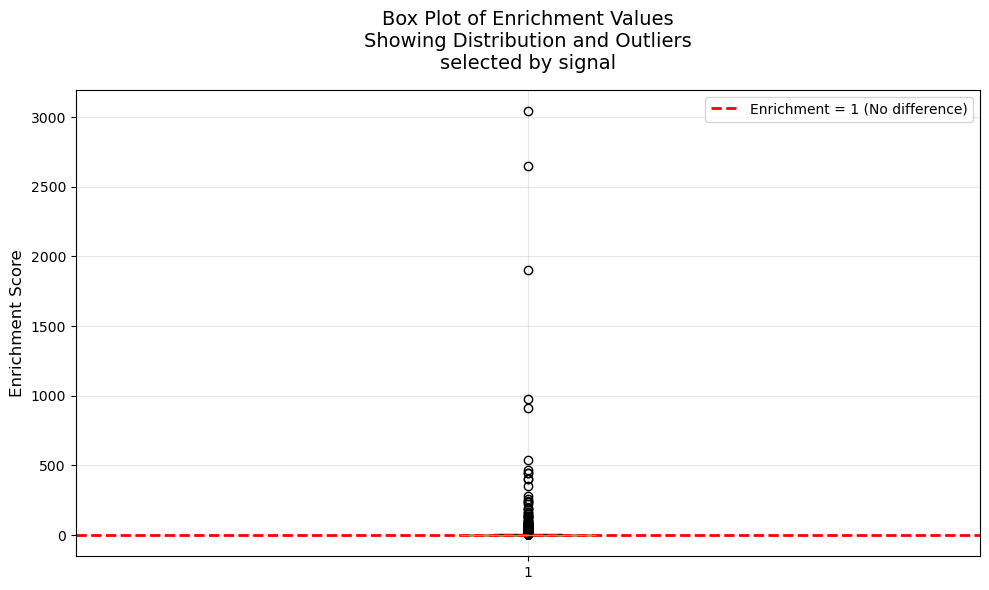

In [16]:
# plot_enrichment_boxplot(both_df_by_peaks, title="selected by peaks")
plot_enrichment_boxplot(both_df_by_signal, title="selected by signal")

In [17]:
outliers_df_signal["nsc_replicates_with_peaks"].value_counts()

signal_nsc_zero_peaks  = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 0]
signal_nsc_one_peaks   = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 1]
signal_nsc_two_peaks   = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 2]
signal_nsc_three_peaks = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 3]

outliers_df_peaks["nsc_replicates_with_peaks"].value_counts()

peaks_nsc_zero_peaks  = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 0]
peaks_nsc_one_peaks   = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 1]
peaks_nsc_two_peaks   = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 2]
peaks_nsc_three_peaks = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 3]

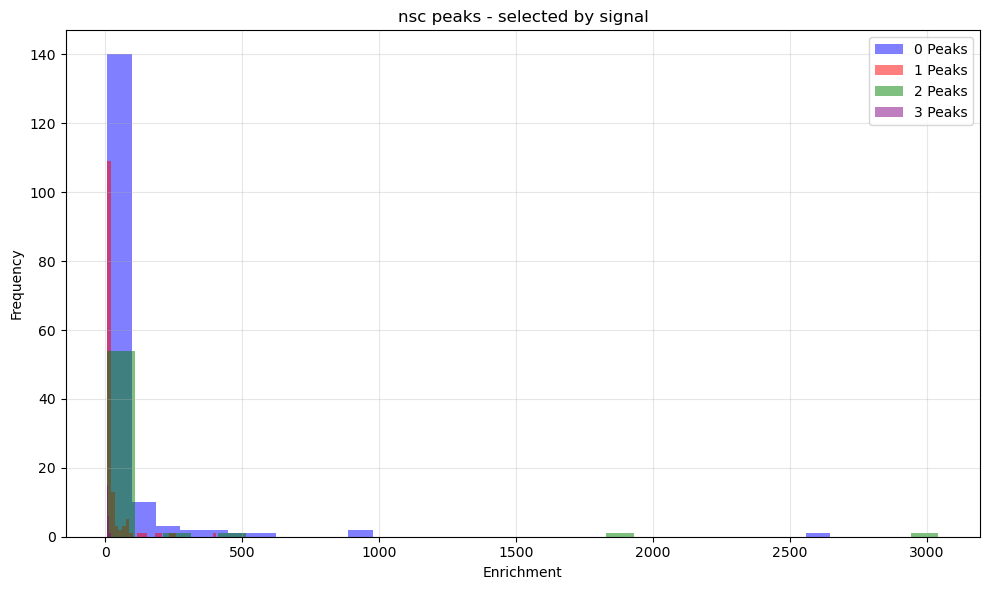

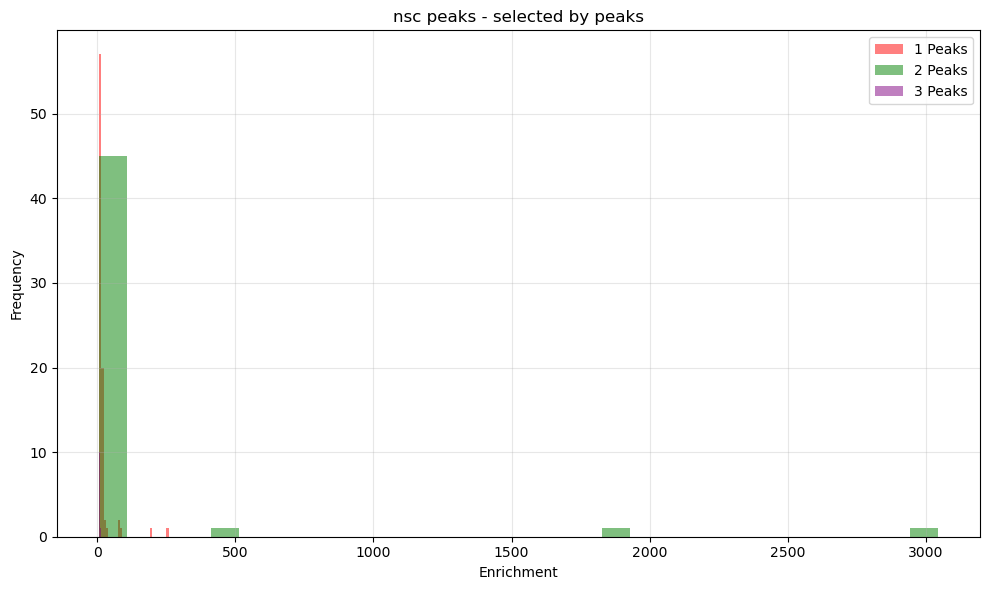

In [18]:
# Classify and plot for signal and peaks outliers
peaks_zero_peaks_signal, peaks_one_peaks_signal, peaks_two_peaks_signal, peaks_three_peaks_signal = plot_by_peaks(outliers_df_signal, peaks_column='nsc_replicates_with_peaks', title="nsc peaks - selected by signal")
peaks_zero_peaks_peaks, peaks_one_peaks_peaks, peaks_two_peaks_peaks, peaks_three_peaks_peaks = plot_by_peaks(outliers_df_peaks, peaks_column='nsc_replicates_with_peaks', title="nsc peaks - selected by peaks")

In [19]:
print_outlier_groups(peaks_two_peaks_peaks, "peaks")


First 5 outliers selected by peaks:
chr4:140,034,425-140,034,657                      enrichment: 3043.026703544749
chr1:37,875,331-37,875,824                        enrichment: 1899.625849063471
chr7:12,803,403-12,803,766                        enrichment: 443.7191411587498
chr5:24,164,871-24,165,339                        enrichment: 48.43033180387787
chr8:22,013,383-22,013,586                        enrichment: 43.259862823170295

Middle 5 outliers selected by peaks:
chr19:59,469,037-59,469,305                       enrichment: 11.1843486210917
chr11:89,301,374-89,302,842                       enrichment: 10.470503374661323
chr4_GL456216_random:33,879-35,465                enrichment: 10.034805400326254
chr11:119,490,996-119,491,996                     enrichment: 9.986181831484776
chr6:128,760,215-128,760,550                      enrichment: 9.975481328318338

Last 5 outliers selected by peaks:
chr10:79,779,936-79,780,219                       enrichment: 7.1639146950241805
chr4:1

In [20]:
print_outlier_groups(peaks_two_peaks_signal, "signal")


First 5 outliers selected by signal:
chr4:140,034,425-140,034,657                      enrichment: 3043.026703544749
chr1:37,875,331-37,875,824                        enrichment: 1899.625849063471
chr7:12,803,403-12,803,766                        enrichment: 443.7191411587498
chr13:46,771,211-46,771,472                       enrichment: 234.4730463826956
chr5:24,164,871-24,165,339                        enrichment: 48.43033180387787

Middle 5 outliers selected by signal:
chr4:134,510,936-134,511,296                      enrichment: 14.296799024640473
chr2:158,695,912-158,696,204                      enrichment: 14.147224039504335
chr19:6,831,101-6,831,499                         enrichment: 13.967746858925548
chr19:6,829,958-6,830,465                         enrichment: 13.967746858925548
chr8:122,630,710-122,630,962                      enrichment: 12.717184058346636

Last 5 outliers selected by signal:
chr1:34,177,942-34,178,193                        enrichment: 7.363131604099482
c

## Regions length distribution

### Region length - defined by the outermost peaks coordinates

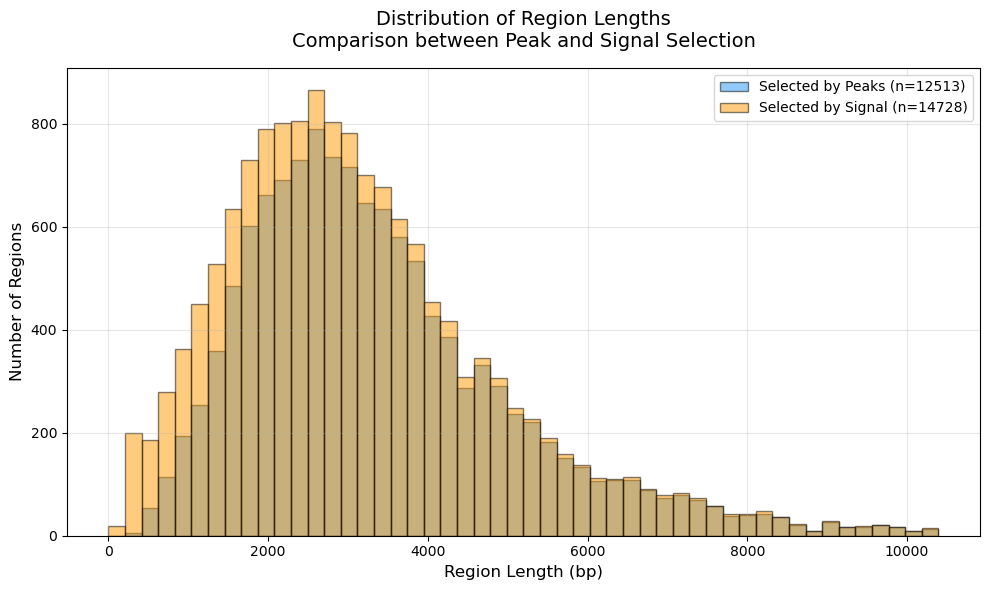

In [21]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='region_length')

In [22]:
both_df_sorted_by_region_length_signal = both_df_by_signal.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_signal.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
9903,chr4,150236643,150237472,47.675792,23.684729,2.012934,0.1,both,both,False,3,3,"37.94593123279767,60.18651302851127,44.894931360781115","32.00876582072813,18.308545432763683,20.73687613113592",19333,829,CpG:,1731,2,3,12.5768;14.1382,15.7933;7.14929;6.87428,150232224,150251557
12179,chr7,45717703,45718318,73.186502,33.712925,2.170874,0.1,both,both,False,3,3,"73.75731885911276,91.58136884385715,54.22081840728452","30.130568605794064,35.65488310846881,35.35332301937675",19242,615,CpG:,933,2,2,15.0251;10.8655,4.89628;11.8479,45700675,45719917
12177,chr7,45713359,45713615,73.403787,33.748239,2.175041,0.1,both,both,False,3,3,"73.98585911264585,91.91310823541411,54.31239324723664","30.138211381089384,35.71502853770806,35.39147714133252",19164,256,CpG:,933,1,3,10.8322,6.8612;6.68945;11.8479,45700675,45719839
12176,chr7,45706651,45707060,73.403787,33.748239,2.175041,0.1,both,both,False,3,3,"73.98585911264585,91.91310823541411,54.31239324723664","30.138211381089384,35.71502853770806,35.39147714133252",19164,409,CpG:,933,2,3,22.8556;18.961,4.31391;12.7485;11.8479,45700675,45719839
12174,chr7,45704790,45705154,73.403787,33.748239,2.175041,0.1,both,both,False,3,3,"73.98585911264585,91.91310823541411,54.31239324723664","30.138211381089384,35.71502853770806,35.39147714133252",19164,364,CpG:,933,2,3,22.8556;18.961,28.2728;12.7485;11.8479,45700675,45719839


In [23]:
both_df_sorted_by_region_length_peaks = both_df_by_peaks.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_peaks.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
9903,chr4,150236643,150237472,47.675792,23.684729,2.012934,0.1,both,both,False,3,3,"37.94593123279767,60.18651302851127,44.894931360781115","32.00876582072813,18.308545432763683,20.73687613113592",19333,829,CpG:,1731,2,3,12.5768;14.1382,15.7933;7.14929;6.87428,150232224,150251557
12179,chr7,45717703,45718318,73.186502,33.712925,2.170874,0.1,both,both,False,3,3,"73.75731885911276,91.58136884385715,54.22081840728452","30.130568605794064,35.65488310846881,35.35332301937675",19242,615,CpG:,933,2,2,15.0251;10.8655,4.89628;11.8479,45700675,45719917
12175,chr7,45705454,45705704,73.403787,33.748239,2.175041,0.1,both,both,False,3,3,"73.98585911264585,91.91310823541411,54.31239324723664","30.138211381089384,35.71502853770806,35.39147714133252",19164,250,CpG:,933,2,3,22.8556;18.961,28.2728;12.7485;11.8479,45700675,45719839
12176,chr7,45706651,45707060,73.403787,33.748239,2.175041,0.1,both,both,False,3,3,"73.98585911264585,91.91310823541411,54.31239324723664","30.138211381089384,35.71502853770806,35.39147714133252",19164,409,CpG:,933,2,3,22.8556;18.961,4.31391;12.7485;11.8479,45700675,45719839
12177,chr7,45713359,45713615,73.403787,33.748239,2.175041,0.1,both,both,False,3,3,"73.98585911264585,91.91310823541411,54.31239324723664","30.138211381089384,35.71502853770806,35.39147714133252",19164,256,CpG:,933,1,3,10.8322,6.8612;6.68945;11.8479,45700675,45719839


In [24]:
print_outlier_groups(both_df_sorted_by_region_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr4:150,236,643-150,237,472                      enrichment: 2.012933802871601
chr7:45,717,703-45,718,318                        enrichment: 2.170873699908756
chr7:45,705,454-45,705,704                        enrichment: 2.1750405057136115
chr7:45,706,651-45,707,060                        enrichment: 2.1750405057136115
chr7:45,713,359-45,713,615                        enrichment: 2.1750405057136115

Middle 5 outliers selected by peaks:
chr17:33,629,088-33,629,329                       enrichment: 1.6216356726276169
chr4:49,059,222-49,059,927                        enrichment: 1.76953806489119
chr12:75,735,241-75,735,934                       enrichment: 0.8479328624411606
chr5:108,132,085-108,132,989                      enrichment: 3.5165518612704822
chr4:134,852,470-134,854,198                      enrichment: 3.5793409460183394

Last 5 outliers selected by peaks:
chr1:15,892,420-15,893,052                        enrichment: 0.8979481742730582
ch

In [25]:
print_outlier_groups(both_df_sorted_by_region_length_signal, "signal")


First 5 outliers selected by signal:
chr4:150,236,643-150,237,472                      enrichment: 2.012933802871601
chr7:45,717,703-45,718,318                        enrichment: 2.170873699908756
chr7:45,713,359-45,713,615                        enrichment: 2.1750405057136115
chr7:45,706,651-45,707,060                        enrichment: 2.1750405057136115
chr7:45,704,790-45,705,154                        enrichment: 2.1750405057136115

Middle 5 outliers selected by signal:
chr11:115,297,267-115,297,688                     enrichment: 4.667035707962648
chr11:120,467,171-120,468,012                     enrichment: 2.0969234799569354
chr2:75,832,130-75,832,557                        enrichment: 1.0608896077701104
chr19:37,233,755-37,234,362                       enrichment: 1.878083116776305
chr4:40,268,291-40,268,700                        enrichment: 2.611213500940202

Last 5 outliers selected by signal:
chr17:17,844,076-17,844,291                       enrichment: 0.546966627209898
c

### CpG length - defined by the CpG coordinates

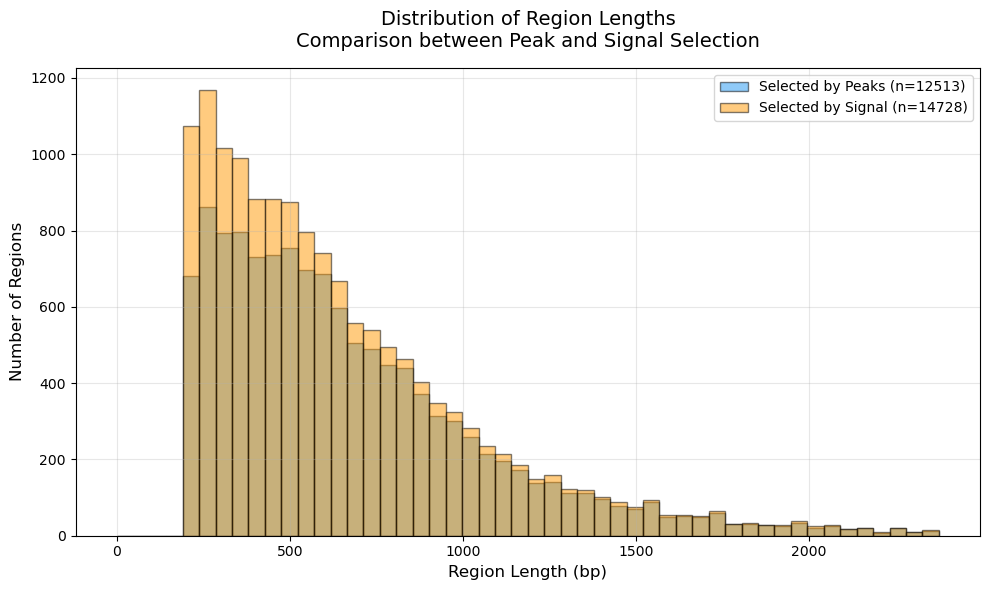

In [26]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='cpg_length')

In [27]:
both_df_sorted_by_cpg_length_peaks = both_df_by_peaks.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_peaks.head()
print_outlier_groups(both_df_sorted_by_cpg_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr8:92,355,697-92,360,826                        enrichment: 1.4406701835396516
chr5:33,430,439-33,435,552                        enrichment: 1.2131558331281185
chrX:12,086,982-12,092,060                        enrichment: 2.2079998578848623
chrX:12,076,861-12,081,915                        enrichment: 2.0990726858277777
chr17:34,118,396-34,122,981                       enrichment: 5.6957625646668015

Middle 5 outliers selected by peaks:
chr9:57,130,733-57,131,318                        enrichment: 2.1705977158234853
chr7:31,150,466-31,151,051                        enrichment: 1.2735061847585407
chr5:135,488,854-135,489,439                      enrichment: 1.487835277631058
chrX:53,056,746-53,057,331                        enrichment: 1.421544238649958
chr8:94,386,178-94,386,763                        enrichment: 1.7827003158879489

Last 5 outliers selected by peaks:
chr2:25,168,000-25,168,201                        enrichment: 0.8407437293363785


In [28]:
both_df_sorted_by_cpg_length_signal = both_df_by_signal.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_signal.head()
print_outlier_groups(both_df_sorted_by_cpg_length_signal, "signal")


First 5 outliers selected by signal:
chr8:92,355,697-92,360,826                        enrichment: 1.4406701835396516
chr5:33,430,439-33,435,552                        enrichment: 1.2131558331281185
chrX:12,086,982-12,092,060                        enrichment: 2.2079998578848623
chrX:12,076,861-12,081,915                        enrichment: 2.0990726858277777
chr17:34,118,396-34,122,981                       enrichment: 5.6957625646668015

Middle 5 outliers selected by signal:
chr9:57,836,514-57,837,066                        enrichment: 4.289376326261243
chr4:52,438,898-52,439,450                        enrichment: 2.2205471394214937
chr13:105,293,968-105,294,519                     enrichment: 1.1398008107321658
chrX:20,291,470-20,292,021                        enrichment: 0.8113209409470481
chr13:95,891,566-95,892,117                       enrichment: 2.1304669162223666

Last 5 outliers selected by signal:
chr1:135,532,492-135,532,693                      enrichment: 0.4322605609463

# Neu only

In [29]:
neu_only_df_by_peaks.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
8391,chr3,13472896,13473372,26.941094,0.0,inf,1.0,neu_only,neu_only,False,3,0,"21.768211049299975,6.74973063652332,52.30534099798936","0.0,0.0,0.0",520,476,CpG:,687,1,0,4.62863,NaN,13472638,13473158
10857,chr5,139543775,139544941,0.348340,0.0,inf,1.0,neu_only,neu_only,False,1,0,"0.0,0.0,1.04502149635014","0.0,0.0,0.0",862,1166,CpG:,1649,1,0,4.15481,NaN,139543801,139544663
3199,chr12,89260160,89260526,8.340816,0.0,inf,1.0,neu_only,neu_only,False,1,0,"25.022449324450154,0.0,0.0","0.0,0.0,0.0",508,366,CpG:,1266,1,0,5.37429,NaN,89260376,89260884
14825,chrX,155305981,155306182,3.712136,0.0,inf,1.0,neu_only,neu_only,False,2,0,"10.323920989231453,0.8124869863733609,0.0","0.0,0.0,0.0",367,201,CpG:,1769,1,0,4.332,NaN,155305679,155306046
7018,chr19,45155826,45156161,4.475221,0.0,inf,1.0,neu_only,neu_only,False,3,0,"2.9749355918758518,0.35839269711421085,10.092335197951767","0.0,0.0,0.0",364,335,CpG:,929,1,0,5.99084,NaN,45155969,45156333


In [30]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['neu_signal', 'nsc_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = neu_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("neu only - by peaks, size:", len(neu_only_df_by_peaks))
stats_df

neu only - by peaks, size: 1379


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,1379.000000,1379.000000,1306.000000,1379.000000,1379.000000,1379.000000
mean,25.553079,12.272459,10.984888,1853.545323,522.224075,0.519676
std,26.079223,11.349193,88.107387,1524.798905,370.557174,0.342919
min,0.000000,0.000000,0.000000,201.000000,201.000000,0.100000
25%,10.943451,4.361811,1.100216,775.000000,271.000000,0.200000
50%,19.428094,9.702375,1.905373,1462.000000,402.000000,0.500000
75%,32.285449,16.764471,3.827857,2517.000000,628.500000,0.800000
max,406.881903,116.330976,2647.920164,13296.000000,2785.000000,1.000000


In [31]:
stats_df = neu_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("neu only - by signal, size:", len(neu_only_df_by_signal))
stats_df

neu only - by signal, size: 128


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,128.000000,128.0,0.0,128.000000,128.000000,128.0
mean,14.698441,0.0,NaN,555.671875,516.921875,1.0
std,16.565639,0.0,NaN,398.714294,399.415313,0.0
min,0.348340,0.0,NaN,193.000000,201.000000,1.0
25%,4.693208,0.0,NaN,262.250000,280.500000,1.0
50%,9.341472,0.0,NaN,395.000000,366.500000,1.0
75%,18.654304,0.0,NaN,723.500000,571.250000,1.0
max,108.602980,0.0,NaN,2222.000000,2316.000000,1.0


In [32]:
print_across_distribution(neu_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr3:13,472,896-13,473,372                        enrichment: inf
chr5:139,543,775-139,544,941                      enrichment: inf
chr12:89,260,160-89,260,526                       enrichment: inf
chrX:155,305,981-155,306,182                      enrichment: inf
chr19:45,155,826-45,156,161                       enrichment: inf

Middle 5 elements selected by peaks:
chr2:157,020,678-157,021,147                      enrichment: 2.0740570675187904
chr11:54,303,909-54,304,468                       enrichment: 2.0739745570493104
chr1:89,968,235-89,968,791                        enrichment: 2.0705381566149006
chr16:28,564,357-28,565,093                       enrichment: 2.068395187134134
chr10:116,301,376-116,301,579                     enrichment: 2.054543643318784

Last 5 elements selected by peaks:
chr8:19,535,156-19,535,754                        enrichment: 0.0
chr12:24,493,515-24,493,726                       enrichment: 0.0
chr7:49,636,312-49,636,8

In [33]:
print_across_distribution(nsc_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr8:19,535,156-19,535,754                        enrichment: 0.0
chr12:24,493,515-24,493,726                       enrichment: 0.0
chr12:20,990,202-20,991,305                       enrichment: 0.0
chr8:20,122,209-20,122,868                        enrichment: 0.0
chr8:20,296,932-20,297,602                        enrichment: 0.0

Middle 5 elements selected by signal:
chr17:35,394,038-35,395,093                       enrichment: 0.0
chr7:49,636,312-49,636,892                        enrichment: 0.0
chr17:36,111,233-36,111,453                       enrichment: 0.0
chr17:36,110,763-36,110,967                       enrichment: 0.0
chr4:3,230,990-3,231,230                          enrichment: 0.0

Last 5 elements selected by signal:
chr17:36,161,661-36,162,048                       enrichment: 0.0
chr7:14,622,325-14,623,100                        enrichment: 0.0
chrX:169,986,832-169,987,780                      enrichment: 0.0
chr15:103,035,731-103,035,96

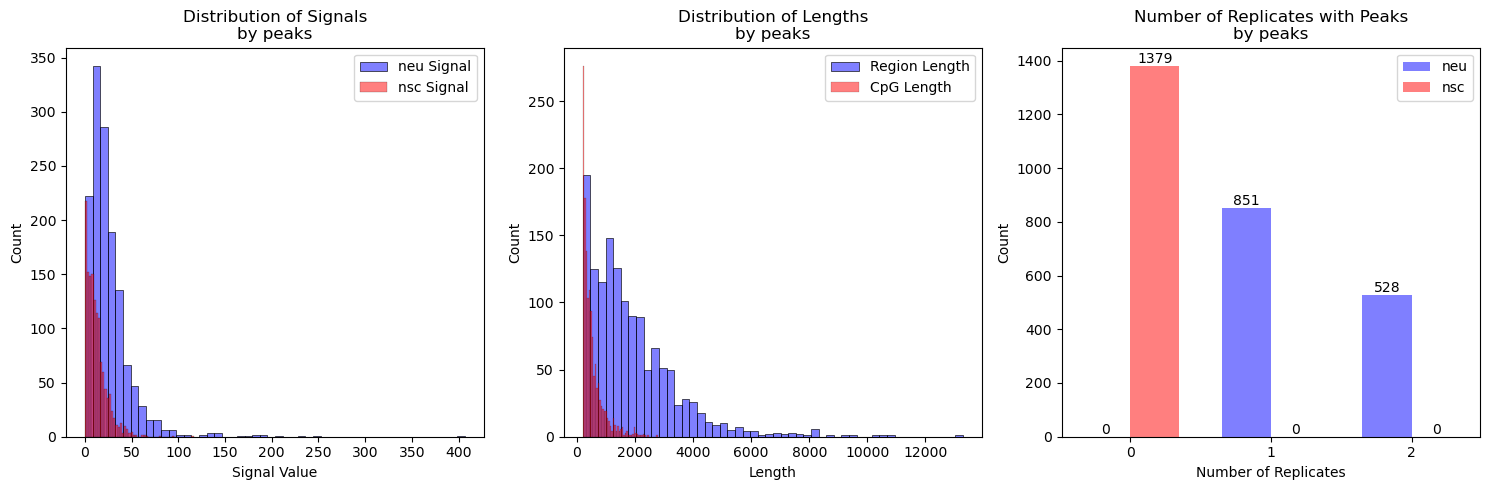

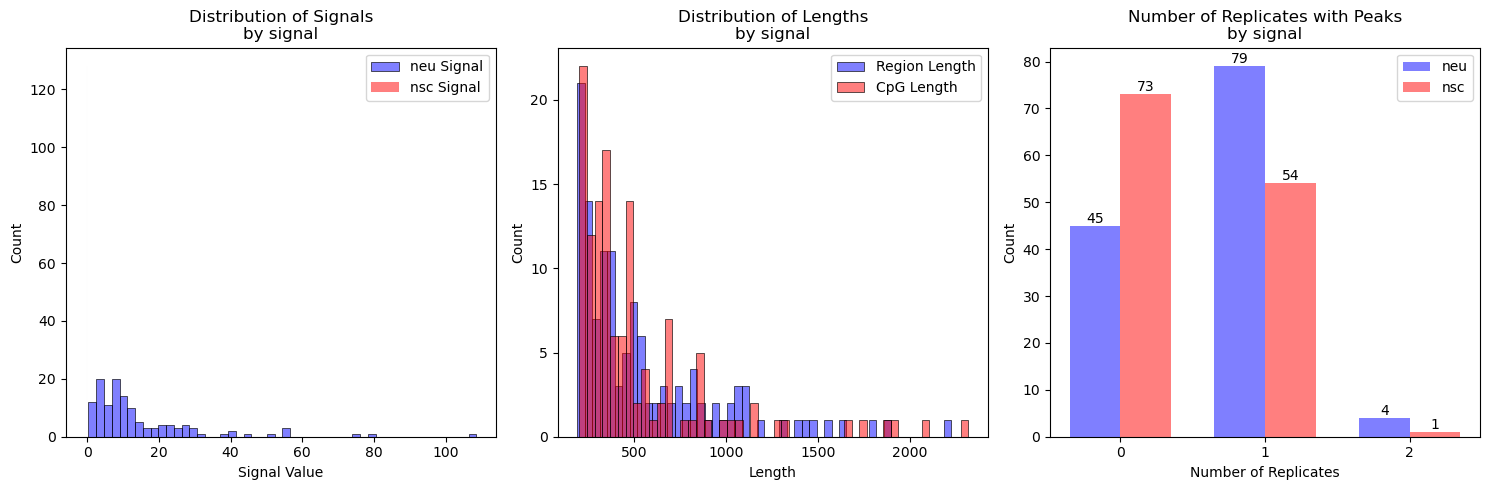

In [34]:
plot_neu_only_distributions(neu_only_df_by_peaks, title="by peaks")
plot_neu_only_distributions(neu_only_df_by_signal, title="by signal")

# NSC only

In [35]:
nsc_only_df_by_peaks.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
8511,chr3,54810972,54811405,12.830330,0.0,inf,1.0,neu_only,nsc_only,False,3,0,"6.904015493233467,24.620023363808723,6.9669523781358595","0.0,0.0,0.0",299,433,CpG:,1003,0,1,NaN,3.75187,54810866,54811165
5508,chr17,6256745,6257192,8.870128,0.0,inf,1.0,neu_only,nsc_only,False,2,0,"11.596917488403964,0.0,15.013467152913412","0.0,0.0,0.0",237,447,CpG:,632,0,1,NaN,6.59402,6257149,6257386
3201,chr12,91647402,91648082,44.177990,0.0,inf,1.0,neu_only,nsc_only,False,3,0,"38.78733281722712,85.6218745282654,8.124762950486138","0.0,0.0,0.0",1327,680,CpG:,1284,0,1,NaN,5.02944,91646801,91648128
5465,chr16,94079059,94079453,0.649920,0.0,inf,1.0,neu_only,nsc_only,False,1,0,"1.949759514863826,0.0,0.0","0.0,0.0,0.0",242,394,CpG:,1302,0,1,NaN,2.71094,94078920,94079162
2382,chr11,96365874,96366265,7.976249,0.0,inf,1.0,neu_only,nsc_only,False,3,0,"1.0900141830685772,6.251458693154251,16.587272994125946","0.0,0.0,0.0",316,391,CpG:,1320,0,1,NaN,2.06063,96365972,96366288


In [36]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['neu_signal', 'nsc_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = nsc_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("nsc only - by peaks, size:", len(nsc_only_df_by_peaks))
stats_df

nsc only - by peaks, size: 979


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,979.000000,979.000000,934.000000,979.000000,979.000000,979.000000
mean,18.996648,12.636123,4.745144,1864.511747,465.790603,0.578209
std,21.166099,11.480455,20.850120,1589.309743,335.678786,0.332028
min,0.000000,0.000000,0.000000,193.000000,201.000000,0.100000
25%,7.658998,4.425566,0.768094,813.000000,249.000000,0.200000
50%,13.843615,9.857877,1.432941,1425.000000,348.000000,0.666667
75%,22.848173,17.360708,2.711781,2420.000000,543.500000,1.000000
max,224.052105,83.431723,405.426103,12458.000000,3159.000000,1.000000


In [37]:
stats_df = nsc_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("nsc only - by signal, size:", len(nsc_only_df_by_signal))
stats_df

nsc only - by signal, size: 15


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,15.0,15.000000,15.0,15.000000,15.000000,15.0
mean,0.0,7.824443,0.0,527.866667,547.933333,1.0
std,0.0,7.249105,0.0,338.955510,317.487338,0.0
min,0.0,0.131809,0.0,244.000000,204.000000,1.0
25%,0.0,2.469210,0.0,272.500000,238.000000,1.0
50%,0.0,5.022968,0.0,353.000000,580.000000,1.0
75%,0.0,11.509199,0.0,712.500000,722.500000,1.0
max,0.0,23.849362,0.0,1291.000000,1103.000000,1.0


In [38]:
print_across_distribution(nsc_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr3:54,810,972-54,811,405                        enrichment: inf
chr17:6,256,745-6,257,192                         enrichment: inf
chr12:91,647,402-91,648,082                       enrichment: inf
chr16:94,079,059-94,079,453                       enrichment: inf
chr11:96,365,874-96,366,265                       enrichment: inf

Middle 5 elements selected by peaks:
chr7:30,347,948-30,348,241                        enrichment: 1.510458038429525
chr7:45,679,084-45,679,307                        enrichment: 1.5067571415380028
chrX:8,206,309-8,206,720                          enrichment: 1.5041527781812691
chr12:86,244,152-86,244,456                       enrichment: 1.5040963754966072
chr4:136,880,487-136,880,738                      enrichment: 1.5012992805240424

Last 5 elements selected by peaks:
chr17:36,110,763-36,110,967                       enrichment: 0.0
chr17:36,161,661-36,162,048                       enrichment: 0.0
chr7:14,622,325-14,623,

In [39]:
print_across_distribution(nsc_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr8:19,535,156-19,535,754                        enrichment: 0.0
chr12:24,493,515-24,493,726                       enrichment: 0.0
chr12:20,990,202-20,991,305                       enrichment: 0.0
chr8:20,122,209-20,122,868                        enrichment: 0.0
chr8:20,296,932-20,297,602                        enrichment: 0.0

Middle 5 elements selected by signal:
chr17:35,394,038-35,395,093                       enrichment: 0.0
chr7:49,636,312-49,636,892                        enrichment: 0.0
chr17:36,111,233-36,111,453                       enrichment: 0.0
chr17:36,110,763-36,110,967                       enrichment: 0.0
chr4:3,230,990-3,231,230                          enrichment: 0.0

Last 5 elements selected by signal:
chr17:36,161,661-36,162,048                       enrichment: 0.0
chr7:14,622,325-14,623,100                        enrichment: 0.0
chrX:169,986,832-169,987,780                      enrichment: 0.0
chr15:103,035,731-103,035,96

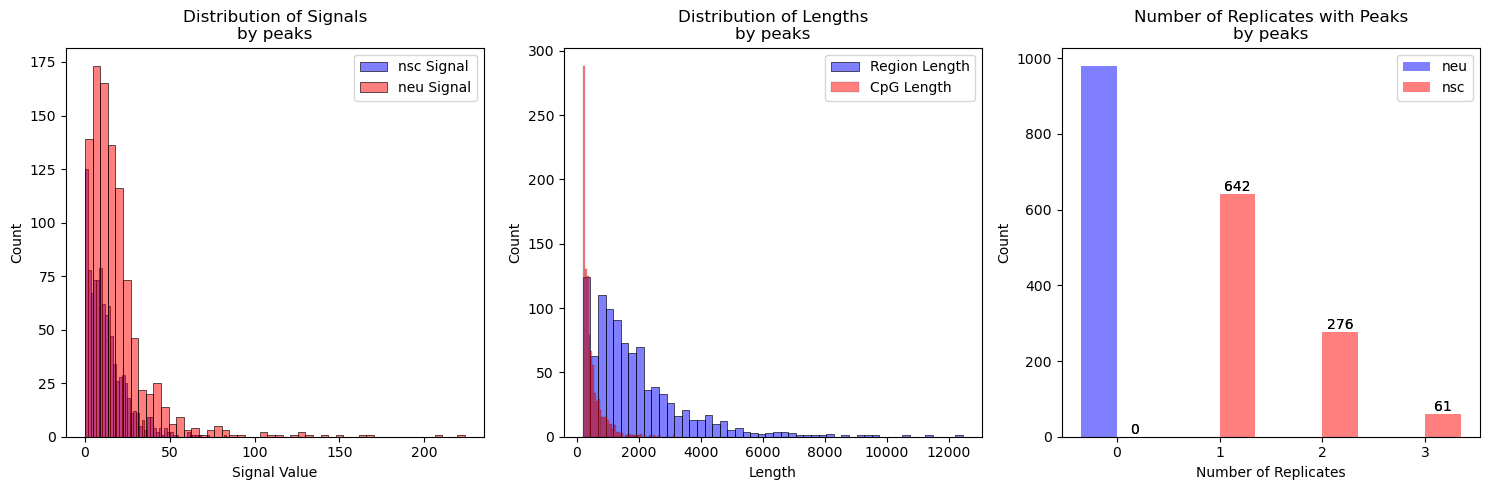

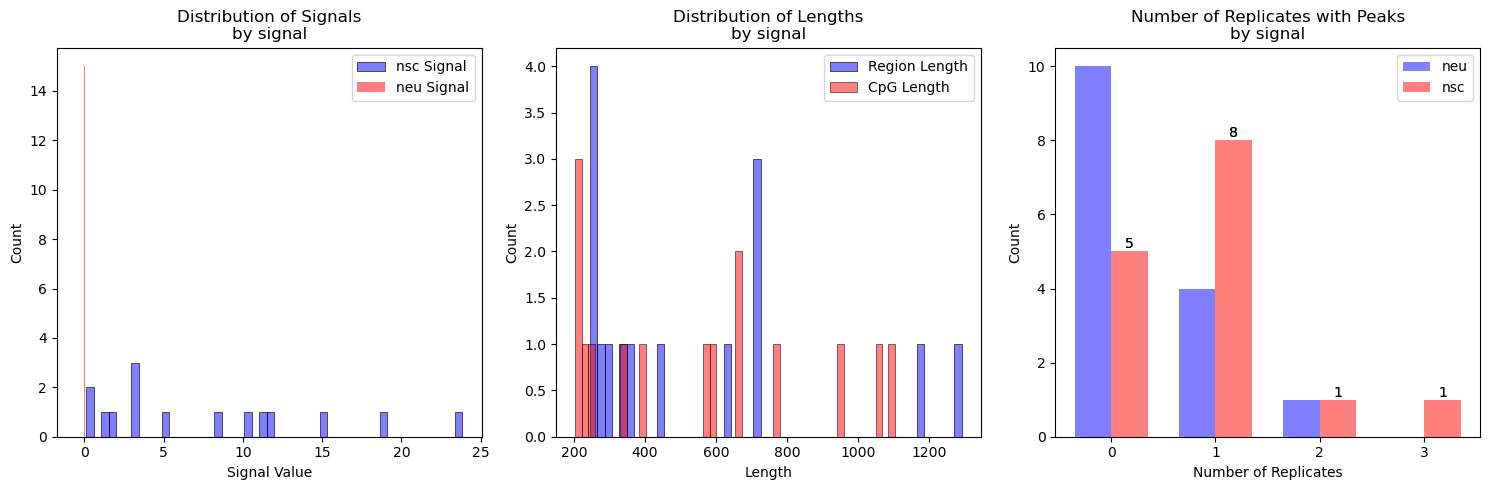

In [40]:
plot_nsc_only_distributions(nsc_only_df_by_peaks, title="by peaks")
plot_nsc_only_distributions(nsc_only_df_by_signal, title="by signal")

# Create output files

## UP in Neu

In [41]:
up_enriched_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
up_enriched_signal_1_5 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1.5) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()    
up_enriched_signal_2 = both_df_by_signal[(both_df_by_signal['enrichment'] > 2) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
up_enriched_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
up_enriched_peaks_1_5 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()    
up_enriched_peaks_2 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 2) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()

In [42]:
print("up_enriched_signal_1.shape:",   up_enriched_signal_1.shape)
print("up_enriched_signal_1_5.shape:", up_enriched_signal_1_5.shape)
print("up_enriched_signal_2.shape:",   up_enriched_signal_2.shape)
print("up_enriched_peaks_1.shape:",    up_enriched_peaks_1.shape)
print("up_enriched_peaks_1_5.shape:",  up_enriched_peaks_1_5.shape)
print("up_enriched_peaks_2.shape:",    up_enriched_peaks_2.shape)

up_enriched_signal_1.shape: (12012, 24)
up_enriched_signal_1_5.shape: (8932, 24)
up_enriched_signal_2.shape: (6062, 24)
up_enriched_peaks_1.shape: (10602, 24)
up_enriched_peaks_1_5.shape: (7896, 24)
up_enriched_peaks_2.shape: (5336, 24)


## UP in NSC

In [43]:
down_enriched_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] < 1.0 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_signal_08 = both_df_by_signal[(both_df_by_signal['enrichment'] < 0.8 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_signal_05 = both_df_by_signal[(both_df_by_signal['enrichment'] < 0.5 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 1.0) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
down_enriched_peaks_08 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 0.8) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
down_enriched_peaks_05 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 0.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()

In [44]:
print("down_enriched_signal_1.shape:",  down_enriched_signal_1.shape)
print("down_enriched_signal_08.shape:", down_enriched_signal_08.shape)
print("down_enriched_signal_05.shape:", down_enriched_signal_05.shape)
print("down_enriched_peaks_1.shape:",   down_enriched_peaks_1.shape)
print("down_enriched_peaks_08.shape:",  down_enriched_peaks_08.shape)
print("down_enriched_peaks_05.shape:",  down_enriched_peaks_05.shape)

down_enriched_signal_1.shape: (2279, 24)
down_enriched_signal_08.shape: (1253, 24)
down_enriched_signal_05.shape: (361, 24)
down_enriched_peaks_1.shape: (1687, 24)
down_enriched_peaks_08.shape: (835, 24)
down_enriched_peaks_05.shape: (158, 24)


## Save output files

In [45]:
up_enriched_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1.csv', index=False)
up_enriched_signal_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1_5.csv', index=False)
up_enriched_signal_2.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_2.csv', index=False)
up_enriched_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1.csv', index=False)
up_enriched_peaks_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1_5.csv', index=False)
up_enriched_peaks_2.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_2.csv', index=False)

down_enriched_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_1.csv', index=False)
down_enriched_signal_08.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_08.csv', index=False)
down_enriched_signal_05.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_05.csv', index=False)
down_enriched_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_1.csv', index=False)
down_enriched_peaks_08.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_08.csv', index=False)
down_enriched_peaks_05.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_05.csv', index=False)

neu_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/neu_only_df_by_signal.csv', index=False)
nsc_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/nsc_only_df_by_signal.csv', index=False)
neu_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/neu_only_df_by_peaks.csv', index=False)
nsc_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/nsc_only_df_by_peaks.csv', index=False)